## Preparation

Loading the dataset about breast cancer:


*   radius (mean of distances from center to points on the perimeter)
*   texture (standard deviation of gray-scale values)

* perimeter

* area

* smoothness (local variation in radius lengths)

* compactness (perimeter^2 / area - 1.0)

* concavity (severity of concave portions of the contour)

* concave points (number of concave portions of the contour)

* symmetry

* fractal dimension (“coastline approximation” - 1)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.



In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.simplefilter(action="ignore")

In [37]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                            columns=np.append(cancer['feature_names'], ['target']))

In [38]:
df['target'].unique()

array([0., 1.])

## Data Inspection/Exploration

In [39]:
df.replace({'target': 1}, "malignant", inplace=True)
df.replace({'target': 0}, "benign", inplace=True)

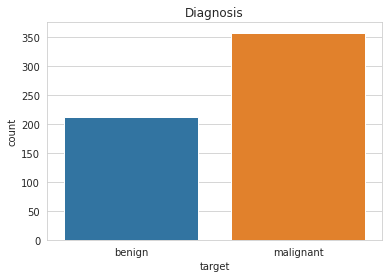

In [40]:
# inspect the distribution

sns.countplot(data = df, x='target')
plt.title('Diagnosis');

In [41]:
#inspect the data and columns
df.info
#df.describe()
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [42]:
#define X and y
X=df.drop(columns='target',axis=1)
y=df['target']


In [79]:
y1=df[['target']]
y1=pd.get_dummies(y1).to_numpy()
y1


array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [43]:
# Prepare the target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)


## 1) Split the Data into Train/Test

In [80]:
from sklearn.model_selection import train_test_split
# use random state 42
X_train,X_test,y_train,y_test=train_test_split(X,y1,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


In [81]:
171/(398+171)

0.30052724077328646

In [82]:
# feature scaling - standardscaler
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler=scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [83]:
print(X_train_scaled.shape,X_test_scaled.shape)

(398, 30) (171, 30)


In [86]:
print(y_train.shape,y_test.shape)

(398, 2) (171, 2)


## Create Classifier

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,InputLayer
from keras.utils import np_utils

'''create dummies from y using keras
dummy_y = np_utils.to_categorical(y)'''

In [88]:
nn=Sequential()
#adding the input and first hidden layer
nn.add(InputLayer(input_shape=(30,)))
nn.add(Dense(128,activation='relu'))

#adding second layer
nn.add(Dense(128,activation='relu'))

#adding the output layer
nn.add(Dense(2,activation='softmax'))


In [89]:
#compile the model
from tensorflow import keras
from keras import optimizers
# define the optimizer
# We use SGD as optimizer and cover more options later on, lets start with a learning rate of 0.01. There are many more parameters that we could be adding in the optimizer,
# but for now let us only declare the lr 
opt=keras.optimizers.SGD(learning_rate=0.01) 



# Calling compile and specifying some mandatory arguments completes setting up the NN, ie. loss and metrics
nn.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])


In [90]:
#show model summary
nn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               3968      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 258       
Total params: 20,738
Trainable params: 20,738
Non-trainable params: 0
_________________________________________________________________


In [91]:
# see if you can reproduce the parameters from input to hidden layer:

#(dimension of W_1)
#W_1=(input_nodes*1hidden_layer_nodes+1hidden_layer_biases)
W_1=(30*128+128)
print(W_1)

# first hidden to second hidden layer

#(dimension of W_2))
print(128*128+128)
# second hidden to output layer
#(dimension of W_3 )
print(129*(2))

3968
16512
258


In [93]:
%%time
#fit the model
nnstory = nn.fit(X_train_scaled,
          y_train,
          epochs=20,
          batch_size=20,
          validation_data=(X_test_scaled, y_test),
          verbose=2)


Epoch 1/20
20/20 - 0s - loss: 0.5716 - accuracy: 0.7161 - val_loss: 0.4119 - val_accuracy: 0.9474
Epoch 2/20
20/20 - 0s - loss: 0.3821 - accuracy: 0.8945 - val_loss: 0.2993 - val_accuracy: 0.9591
Epoch 3/20
20/20 - 0s - loss: 0.3006 - accuracy: 0.9171 - val_loss: 0.2422 - val_accuracy: 0.9474
Epoch 4/20
20/20 - 0s - loss: 0.2546 - accuracy: 0.9347 - val_loss: 0.2070 - val_accuracy: 0.9415
Epoch 5/20
20/20 - 0s - loss: 0.2252 - accuracy: 0.9347 - val_loss: 0.1830 - val_accuracy: 0.9415
Epoch 6/20
20/20 - 0s - loss: 0.2043 - accuracy: 0.9372 - val_loss: 0.1654 - val_accuracy: 0.9474
Epoch 7/20
20/20 - 0s - loss: 0.1885 - accuracy: 0.9397 - val_loss: 0.1521 - val_accuracy: 0.9532
Epoch 8/20
20/20 - 0s - loss: 0.1761 - accuracy: 0.9422 - val_loss: 0.1413 - val_accuracy: 0.9532
Epoch 9/20
20/20 - 0s - loss: 0.1660 - accuracy: 0.9447 - val_loss: 0.1326 - val_accuracy: 0.9591
Epoch 10/20
20/20 - 0s - loss: 0.1576 - accuracy: 0.9472 - val_loss: 0.1251 - val_accuracy: 0.9649
Epoch 11/20
20/20 -

In [95]:
#evaluate the model and save it into the variable score
score=nn.evaluate(X_test_scaled,y_test)


6/6 [==============================] - 0s 684us/step - loss: 0.0858 - accuracy: 0.9649


The metrics that *evaluate()* gives us depend on the input argument *metrics* that we used when setting up our NN. Keras knows several other metrics (see [Keras doc. for details](https://keras.io/metrics/)) but not all known metrics are supported for training the NN. Between, you can also extend the set of metrics with customer metrics (see this [example](https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/) if interested.).

We also have access to model performance results via the result of *model.fit()*, that is our variable *story*.

In [ ]:
# Now install the tensorflow addons and define the following metrics. You have AUC,Precision and Recall in Keras Metrics but F1 you will need to get it from tensorflow addons


In [96]:
!pip install tensorflow-addons



     |████████████████████████████████| 679 kB 3.8 MB/s eta 0:00:01     |███▉                            | 81 kB 3.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/A19893678/local/miniconda3/bin/python -m pip install --upgrade pip' command.


In [124]:
import keras
import tensorflow as tf 
import tensorflow_addons as tfa


metrics = [
    keras.metrics.Precision(),
    keras.metrics.Recall(),
    keras.metrics.AUC(),
    keras.metrics.BinaryAccuracy(),
    keras.metrics.CategoricalAccuracy(),
    tfa.metrics.F1Score(
        name="f1_micro",
        average="micro",
        num_classes=2,
        threshold=0.5,
    ),
    tfa.metrics.F1Score(
        name="f1_weighted",
        average="weighted",
        num_classes=2,
        threshold=0.5,
    ),
]

In [125]:
%%time
# rerun the mmodel with the above defined metrics in your complie call
nn.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=metrics)

nn2story = nn.fit(X_train_scaled,
          y_train,
          epochs=40,
          batch_size=20,
          validation_data=(X_test_scaled, y_test),
          verbose=0)

CPU times: user 2.33 s, sys: 79.1 ms, total: 2.41 s
Wall time: 2.27 s


In [126]:
# print Test Loss and Accuracy and plot the history
print(f"Test loss: {nnstory.history['val_loss'][-1]},Test accuracy: {nnstory.history['val_accuracy'][-1]}")
#nnstory.history.keys()

Test loss: 0.08576633781194687,Test accuracy: 0.9649122953414917


In [127]:
for k,v in nn2story.history.items():
    #if  'loss' in k:
    print(k,': ',v[-1])
    

loss :  0.014184086583554745
precision_4 :  0.9974874258041382
recall_4 :  0.9974874258041382
auc_4 :  0.9999936819076538
binary_accuracy :  0.9974874258041382
categorical_accuracy :  0.9974874258041382
f1_micro :  0.9974874258041382
f1_weighted :  0.9974856376647949
val_loss :  0.057807426899671555
val_precision_4 :  0.9824561476707458
val_recall_4 :  0.9824561476707458
val_auc_4 :  0.997366726398468
val_binary_accuracy :  0.9824561476707458
val_categorical_accuracy :  0.9824561476707458
val_f1_micro :  0.9824561476707458
val_f1_weighted :  0.9824262857437134


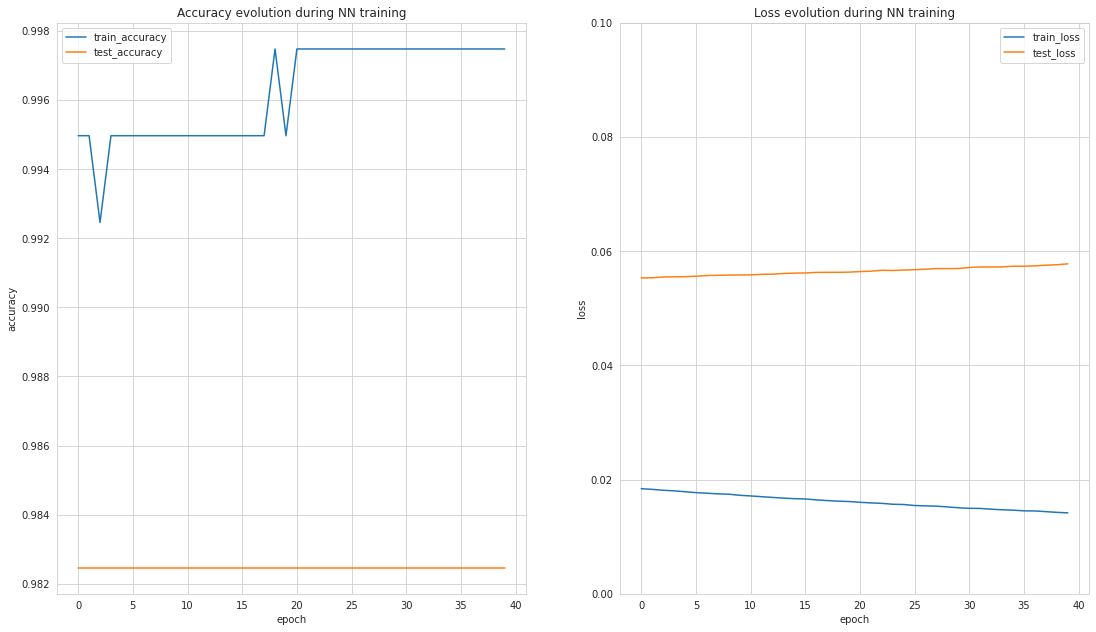

In [129]:
def show_history(story):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18.5, 10.5)
    ax1.plot(story.history['binary_accuracy'])
    ax1.plot(story.history['val_binary_accuracy'])
    ax1.set(xlabel='epoch', ylabel='accuracy')
    ax1.legend(['train_accuracy', 'test_accuracy'], loc='best')
    ax1.set_title('Accuracy evolution during NN training')
    #ax1.set_ylim(0.9,1)
    
    ax2.plot(story.history['loss'])
    ax2.plot(story.history['val_loss'])
    ax2.set(xlabel='epoch', ylabel='loss')
    ax2.legend(['train_loss', 'test_loss'], loc='best')
    ax2.set_title('Loss evolution during NN training')
    ax2.set_ylim(0,0.1)

    plt.show()

show_history(nn2story)

If validation loss >> training loss you can call it overfitting.

If validation loss  > training loss you can call it some overfitting.

If validation loss  < training loss you can call it some underfitting.

If validation loss << training loss you can call it underfitting.

Just right if training loss ~ validation loss

[Check out this link](https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323)

```
# This is formatted as code
```



Typically validation loss should be similar to but slightly higher than training loss. 
As long as validation loss is lower than or even equal to training loss one should keep doing more training.
If training loss is reducing without increase in validation loss then again keep doing more training
If validation loss starts increasing then it is time to stop
Some over-fitting is nearly always a good thing. All that matters in the end is: is the validation loss as low as you can get it! 

If overall accuracy still not acceptable then review mistakes model is making and think of what can one change:
More data? More / different data augmentations? Different architecture?

In [138]:
# Compute predictions of X_test
yhat = nn.predict(X_test_scaled)
yhat[0]

array([0.02256733, 0.9774327 ], dtype=float32)

In [143]:
# Finding the most probable class
yhat_c=np.rint(yhat)
yhat_c[:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [150]:
yhat_c = np.argmax(yhat, axis=1)
#print(yhat_c.shape)


(array([0, 1], dtype=uint8), array([171, 171]))

In [152]:
# print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test[:,1],yhat_c)

array([[ 61,   2],
       [  1, 107]])

In [155]:
#print calssification report
from sklearn.metrics import classification_report

print(classification_report(y_test[:,1], yhat_c))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [157]:
nn.save("team3.h5")